### "Weather Prediction Model for London’s Daily Mean Temperature (1979-2023)"

#### Name: Sijin S

#### Organisation: Entri Elevate

#### Date:

##### Overview Of Problem Statement:-
This project aims to develop a weather prediction model for London's daily mean temperature (TG) using a regression model. The model will analyze historical weather data from 1979 to 2023 to identify patterns and relationships between temperature and other weather variables. The goal is to build an accurate regression model capable of predicting future temperature trends and assisting in weather forecasting and climate analysis.

##### Objective:-
To develop a regression model to accurately predict London's daily mean temperature (TG) based on historical weather data from 1979 to 2023. The project aims to analyze the relationship between temperature and various weather variables, such as humidity, air pressure, and other factors, to build a robust model. By leveraging regression techniques, the model will forecast future temperature trends and provide insights into long-term weather patterns. The overall goal is to create a reliable tool for weather prediction and contribute to climate studies through data-driven analysis.

##### Data Description:-
* **Source Of Data**: [https://www.kaggle.com/datasets/zongaobian/london-weather-data-from-1979-to-2023]
* **Features:-*** **DATE:** Observation date
* **TX  :** Maximum temperature
* **Q_TX:** Quality flag for maximum temperature* **TN  :** Minimum temperature
* **Q_TN:** Quality flag for minimum temperature
* **TG  :** Mean temperatu* **	*_TG**: Quality flag for mean temperaur*
* **SS  :** Sunshine duration
* **Q_SS:** Quality flag for sunshine duration
* **SD  :** Snow depth
* **Q_SD:** Quality flag for snow depth
* **RR  :** Precipitation amount
* **Q_RR:** Quality flag for precipitation
* **QQ  :** Global radiation
* **Q_QQ:** Quality flag for global radiation
* **PP  :** Atmospheric pressure
* **Q_PP:** Quality flag for atmospheric pressure
* **HU  :** Relative humidity
* **Q_HU:** Quality flag for relative humidity
* **CC  :** Cloud cover
* **Q_CC:** Quality flag for cloud covereuality fl

* **Shape Of the Dataset:** (16436 rows 
  r cloud cover



* These columns likely represent meteorological or climate data measurements
* Quality flags typically indicate data reliability or any detected anomalies

In [8]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

import joblib
import warnings
warnings.filterwarnings("ignore")

##### Data Collection

In [10]:
data = pd.read_csv('london_weather_data_1979_to_2023.csv')
data

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,...,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,...,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,...,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,...,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0


In [11]:
df = pd.DataFrame(data)

In [12]:
df.head(15)

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0
5,19790106,83.0,0,-66.0,0,-5.0,0,38.0,0,1.0,...,7.0,0,39.0,0,10278.0,0,84.0,0,5.0,0
6,19790107,85.0,0,-53.0,0,15.0,0,0.0,0,0.0,...,52.0,0,13.0,0,10252.0,0,93.0,0,8.0,0
7,19790108,58.0,1,53.0,0,69.0,1,1.0,0,0.0,...,8.0,0,15.0,0,10187.0,0,95.0,0,8.0,0
8,19790109,52.0,0,16.0,0,37.0,0,58.0,0,0.0,...,72.0,0,50.0,0,10117.0,0,86.0,0,4.0,0
9,19790110,49.0,0,14.0,0,33.0,0,19.0,0,0.0,...,21.0,0,30.0,0,9870.0,0,87.0,0,7.0,0


In [13]:
df.dtypes

DATE      int64
TX      float64
Q_TX      int64
TN      float64
Q_TN      int64
TG      float64
Q_TG      int64
SS      float64
Q_SS      int64
SD      float64
Q_SD      int64
RR      float64
Q_RR      int64
QQ      float64
Q_QQ      int64
PP      float64
Q_PP      int64
HU      float64
Q_HU      int64
CC      float64
Q_CC      int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16436 non-null  int64  
 1   TX      16436 non-null  float64
 2   Q_TX    16436 non-null  int64  
 3   TN      16436 non-null  float64
 4   Q_TN    16436 non-null  int64  
 5   TG      16407 non-null  float64
 6   Q_TG    16436 non-null  int64  
 7   SS      16436 non-null  float64
 8   Q_SS    16436 non-null  int64  
 9   SD      15361 non-null  float64
 10  Q_SD    16436 non-null  int64  
 11  RR      16436 non-null  float64
 12  Q_RR    16436 non-null  int64  
 13  QQ      16411 non-null  float64
 14  Q_QQ    16436 non-null  int64  
 15  PP      16432 non-null  float64
 16  Q_PP    16436 non-null  int64  
 17  HU      16379 non-null  float64
 18  Q_HU    16436 non-null  int64  
 19  CC      16418 non-null  float64
 20  Q_CC    16436 non-null  int64  
dtypes: float64(10), int64(11)
memory us

In [15]:
df.describe()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
count,1.643600e+04,16436.000000,16436.000000,16436.000000,16436.000000,16407.000000,16436.000000,16436.000000,16436.0,15361.000000,...,16436.000000,16436.0,16411.00000,16436.000000,16432.000000,16436.00000,16379.000000,16436.000000,16418.000000,16436.000000
mean,2.001066e+07,154.686846,0.068082,76.016427,0.015454,115.373316,0.083962,43.153626,0.0,0.034633,...,16.791738,0.0,119.52020,0.017036,10153.889423,0.00219,76.283717,0.031212,5.256426,0.009978
std,1.298742e+05,65.741246,0.251895,53.392049,0.123353,57.457444,0.451623,39.992648,0.0,0.519639,...,37.614507,0.0,89.26958,0.355343,105.196268,0.14039,10.520699,0.529104,2.091593,0.297885
min,1.979010e+07,-62.000000,0.000000,-118.000000,0.000000,-76.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,9596.000000,0.00000,33.000000,0.000000,0.000000,0.000000
25%,1.990040e+07,106.000000,0.000000,36.000000,0.000000,72.000000,0.000000,4.000000,0.0,0.000000,...,0.000000,0.0,42.00000,0.000000,10091.000000,0.00000,69.000000,0.000000,4.000000,0.000000
50%,2.001070e+07,151.000000,0.000000,78.000000,0.000000,114.000000,0.000000,35.000000,0.0,0.000000,...,0.000000,0.0,96.00000,0.000000,10162.000000,0.00000,77.000000,0.000000,6.000000,0.000000
75%,2.012095e+07,204.000000,0.000000,118.000000,0.000000,161.000000,0.000000,71.000000,0.0,0.000000,...,16.000000,0.0,187.00000,0.000000,10225.000000,0.00000,84.000000,0.000000,7.000000,0.000000
max,2.023123e+07,402.000000,1.000000,223.000000,1.000000,309.000000,9.000000,157.000000,0.0,22.000000,...,618.000000,0.0,402.00000,9.000000,10477.000000,9.00000,100.000000,9.000000,9.000000,9.000000


##### Data Preprocessing

In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

DATE       0
TX         0
Q_TX       0
TN         0
Q_TN       0
TG        29
Q_TG       0
SS         0
Q_SS       0
SD      1075
Q_SD       0
RR         0
Q_RR       0
QQ        25
Q_QQ       0
PP         4
Q_PP       0
HU        57
Q_HU       0
CC        18
Q_CC       0
dtype: int64

In [19]:
#Removing Null Values
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

DATE    0
TX      0
Q_TX    0
TN      0
Q_TN    0
TG      0
Q_TG    0
SS      0
Q_SS    0
SD      0
Q_SD    0
RR      0
Q_RR    0
QQ      0
Q_QQ    0
PP      0
Q_PP    0
HU      0
Q_HU    0
CC      0
Q_CC    0
dtype: int64

In [21]:
df.shape

(15264, 21)

In [22]:
df.dtypes

DATE      int64
TX      float64
Q_TX      int64
TN      float64
Q_TN      int64
TG      float64
Q_TG      int64
SS      float64
Q_SS      int64
SD      float64
Q_SD      int64
RR      float64
Q_RR      int64
QQ      float64
Q_QQ      int64
PP      float64
Q_PP      int64
HU      float64
Q_HU      int64
CC      float64
Q_CC      int64
dtype: object

Some of the values in the dataset are represented in a 0-1 format, which do not indicate true outliers. As a result, certain columns were dropped to improve the quality of the data for modeling.

In [24]:
col_to_fix_outliers = ['TX', 'TN','TG','SS',
        'RR', 'QQ', 'PP','HU','CC']
   

In [25]:
df.columns

Index(['DATE', 'TX', 'Q_TX', 'TN', 'Q_TN', 'TG', 'Q_TG', 'SS', 'Q_SS', 'SD',
       'Q_SD', 'RR', 'Q_RR', 'QQ', 'Q_QQ', 'PP', 'Q_PP', 'HU', 'Q_HU', 'CC',
       'Q_CC'],
      dtype='object')

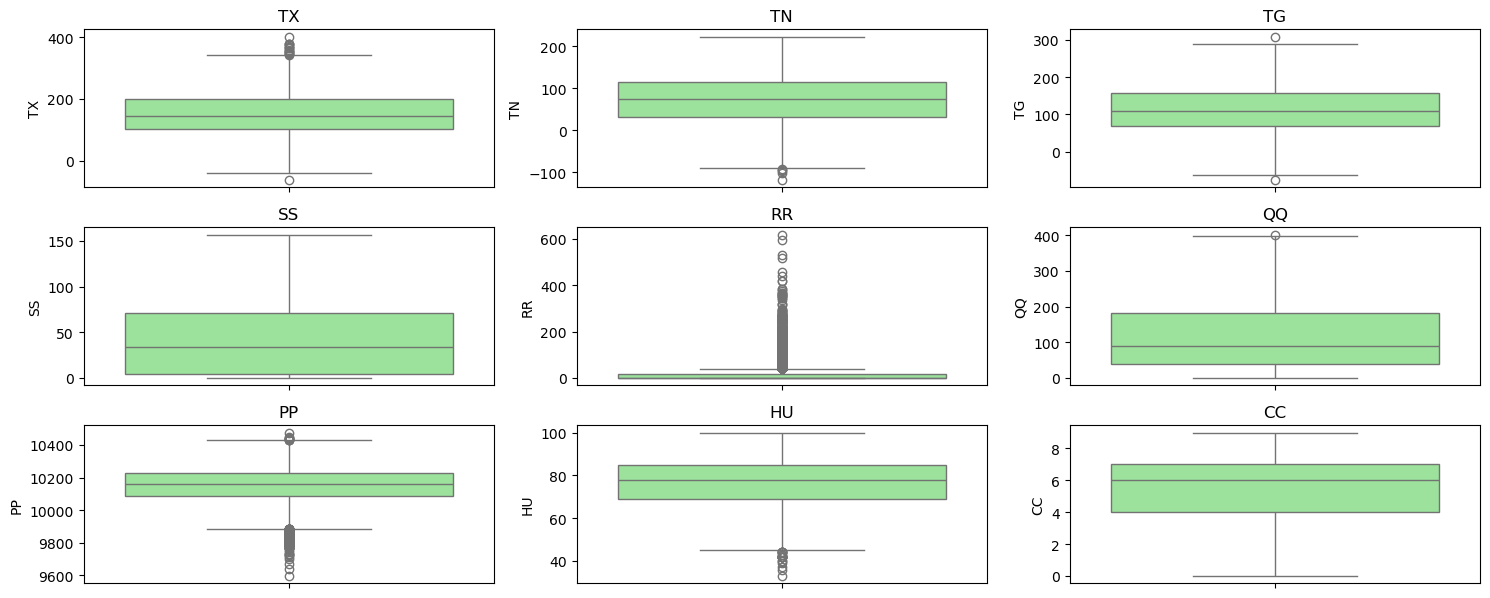

In [26]:
#visualizing outliers using boxplot
plt.figure(figsize=(15,10))
for i,col in enumerate(col_to_fix_outliers):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

Outliers in the 'SD' column are not fixed, assuming minimal impact on the target variable 'TG' based on relevance and data analysis.

In [28]:
#fixing Outliers
for column in col_to_fix_outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1 #Inter Quantile Range
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
   
    #Capping
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

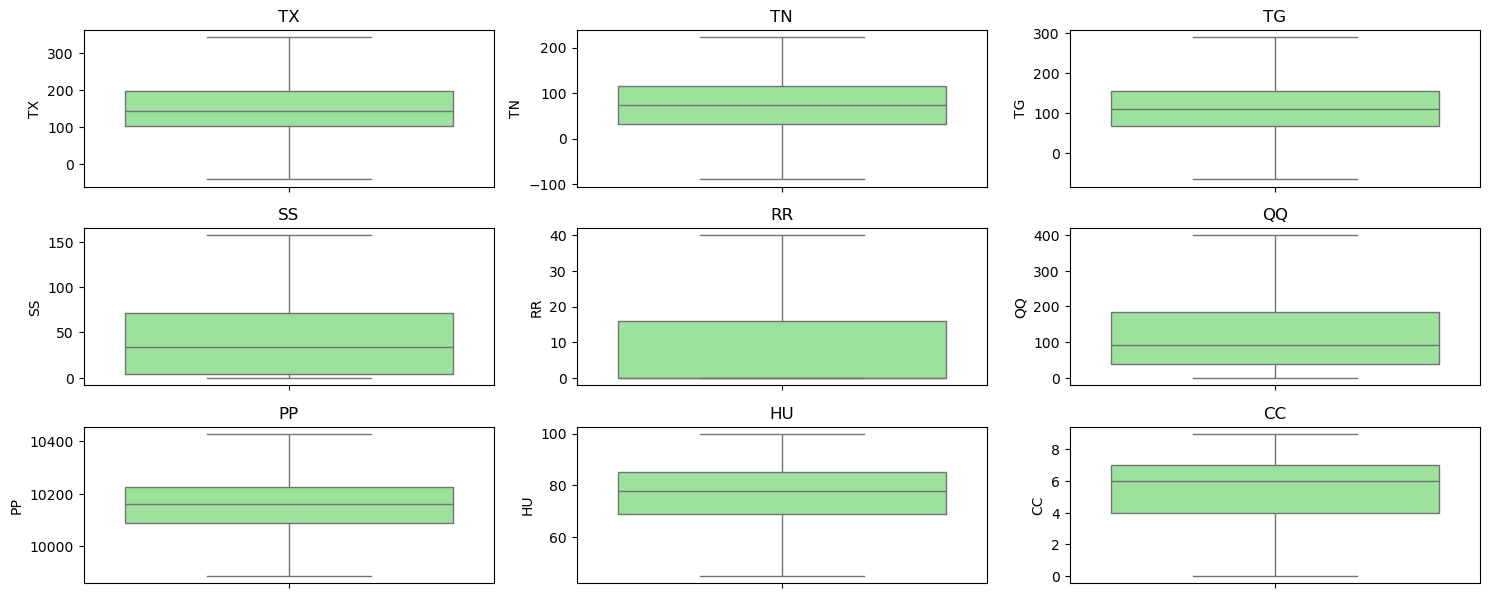

In [29]:
# Visualizing Outliers After fixing by IQR Method
plt.figure(figsize=(15,10))
for i,col in enumerate(col_to_fix_outliers):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()


In [30]:
#cheching Skewness
df[col_to_fix_outliers].skew()

TX    0.195376
TN   -0.106950
TG    0.065281
SS    0.707787
RR    1.235402
QQ    0.707593
PP   -0.309526
HU   -0.360000
CC   -0.711274
dtype: float64

In [31]:
#Fixing Skewness Using Log & Yeo-Jhonson Method
pt = PowerTransformer(method='yeo-johnson')
df['RR'] = np.log(df['RR']+1)
df['SS'] = np.sqrt(df['SS']+1)
df['QQ'] = np.sqrt(df['QQ']+1)
df['CC'] = pt.fit_transform(df[['CC']])

In [32]:
#checking Skewness
df[col_to_fix_outliers].skew()

TX    0.195376
TN   -0.106950
TG    0.065281
SS    0.018680
RR    0.600594
QQ    0.206754
PP   -0.309526
HU   -0.360000
CC   -0.286443
dtype: float64

<Axes: ylabel='Density'>

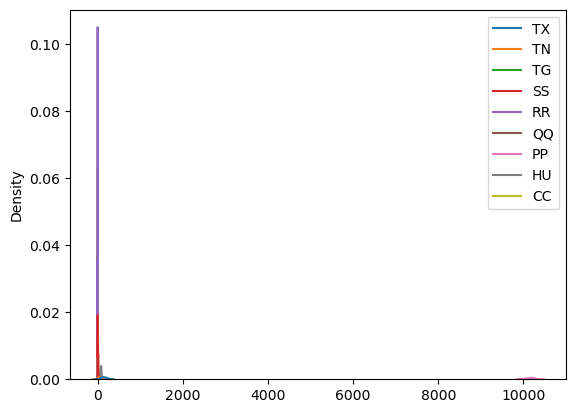

In [33]:
#Checking Skew visualizing
sns.kdeplot(df[col_to_fix_outliers])

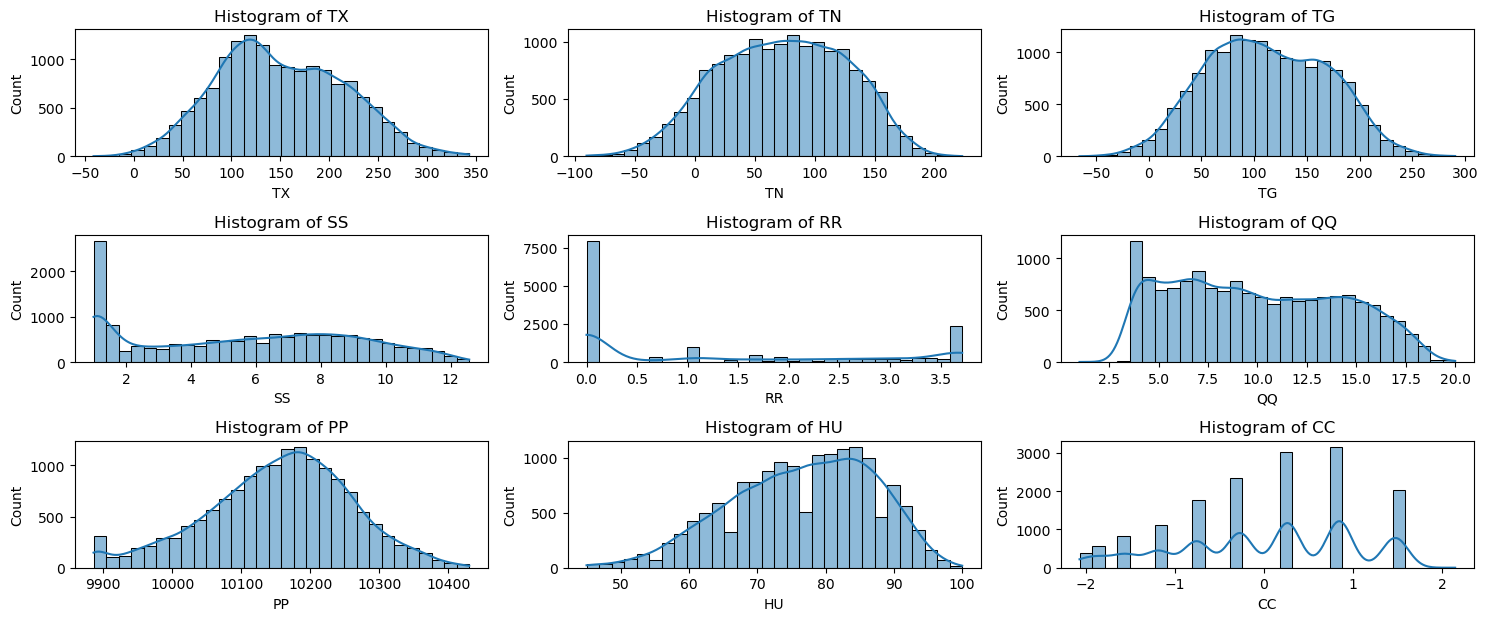

In [34]:
#Visualizing Skewness and Outliers in Data Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(col_to_fix_outliers, 1):
    plt.subplot(5, 3, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()     


##### Exploratory Data Analysis (EDA)

In [36]:
num_col = df.select_dtypes(include = 'number')

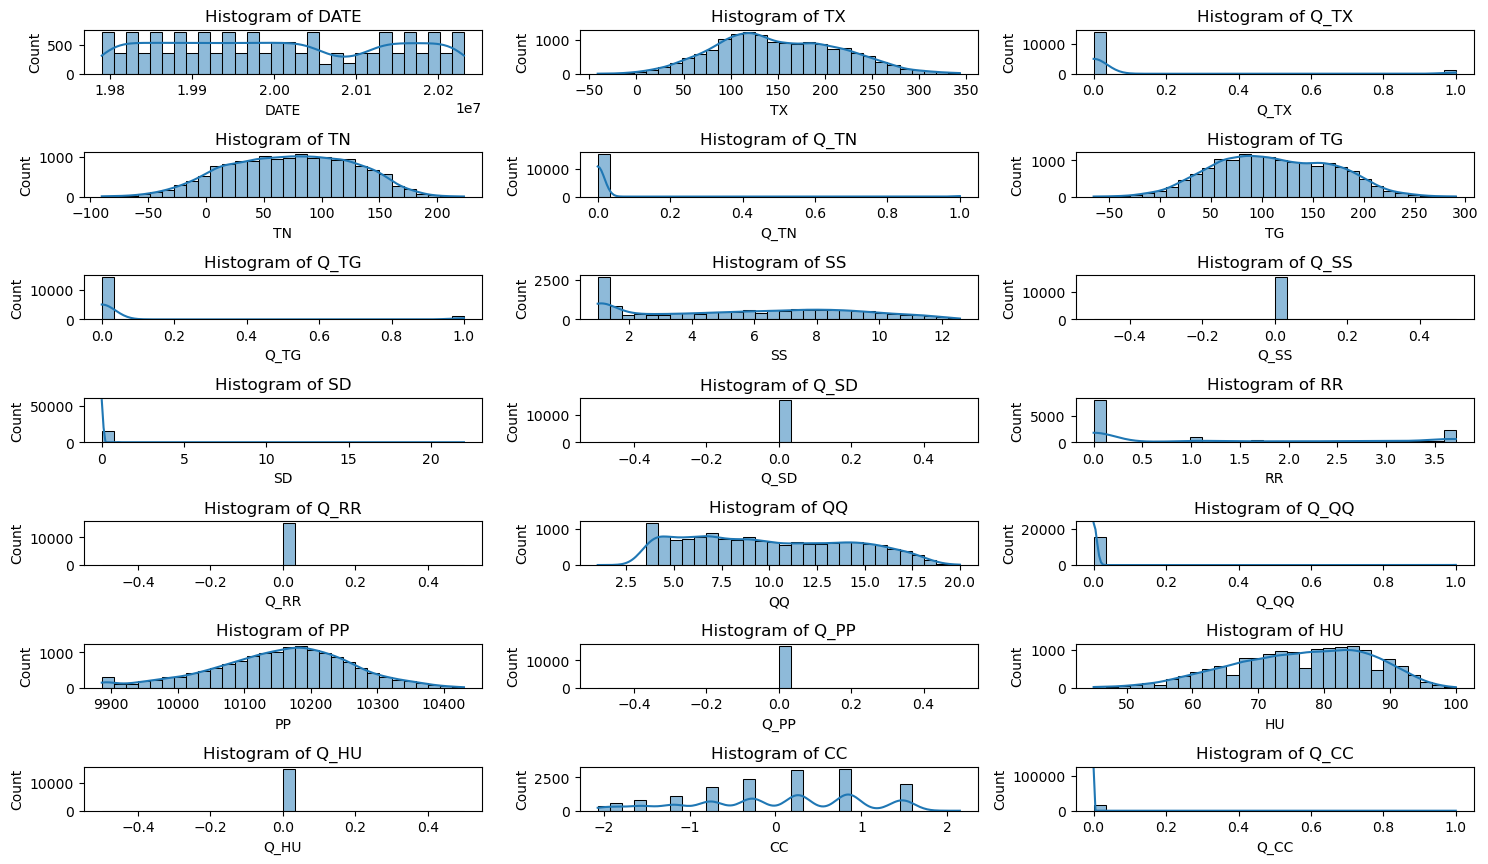

In [37]:
#Visualizing Distributions of Numerical Features with Histograms and KDE
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_col, 1):
    plt.subplot(10, 3, i)  
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()     

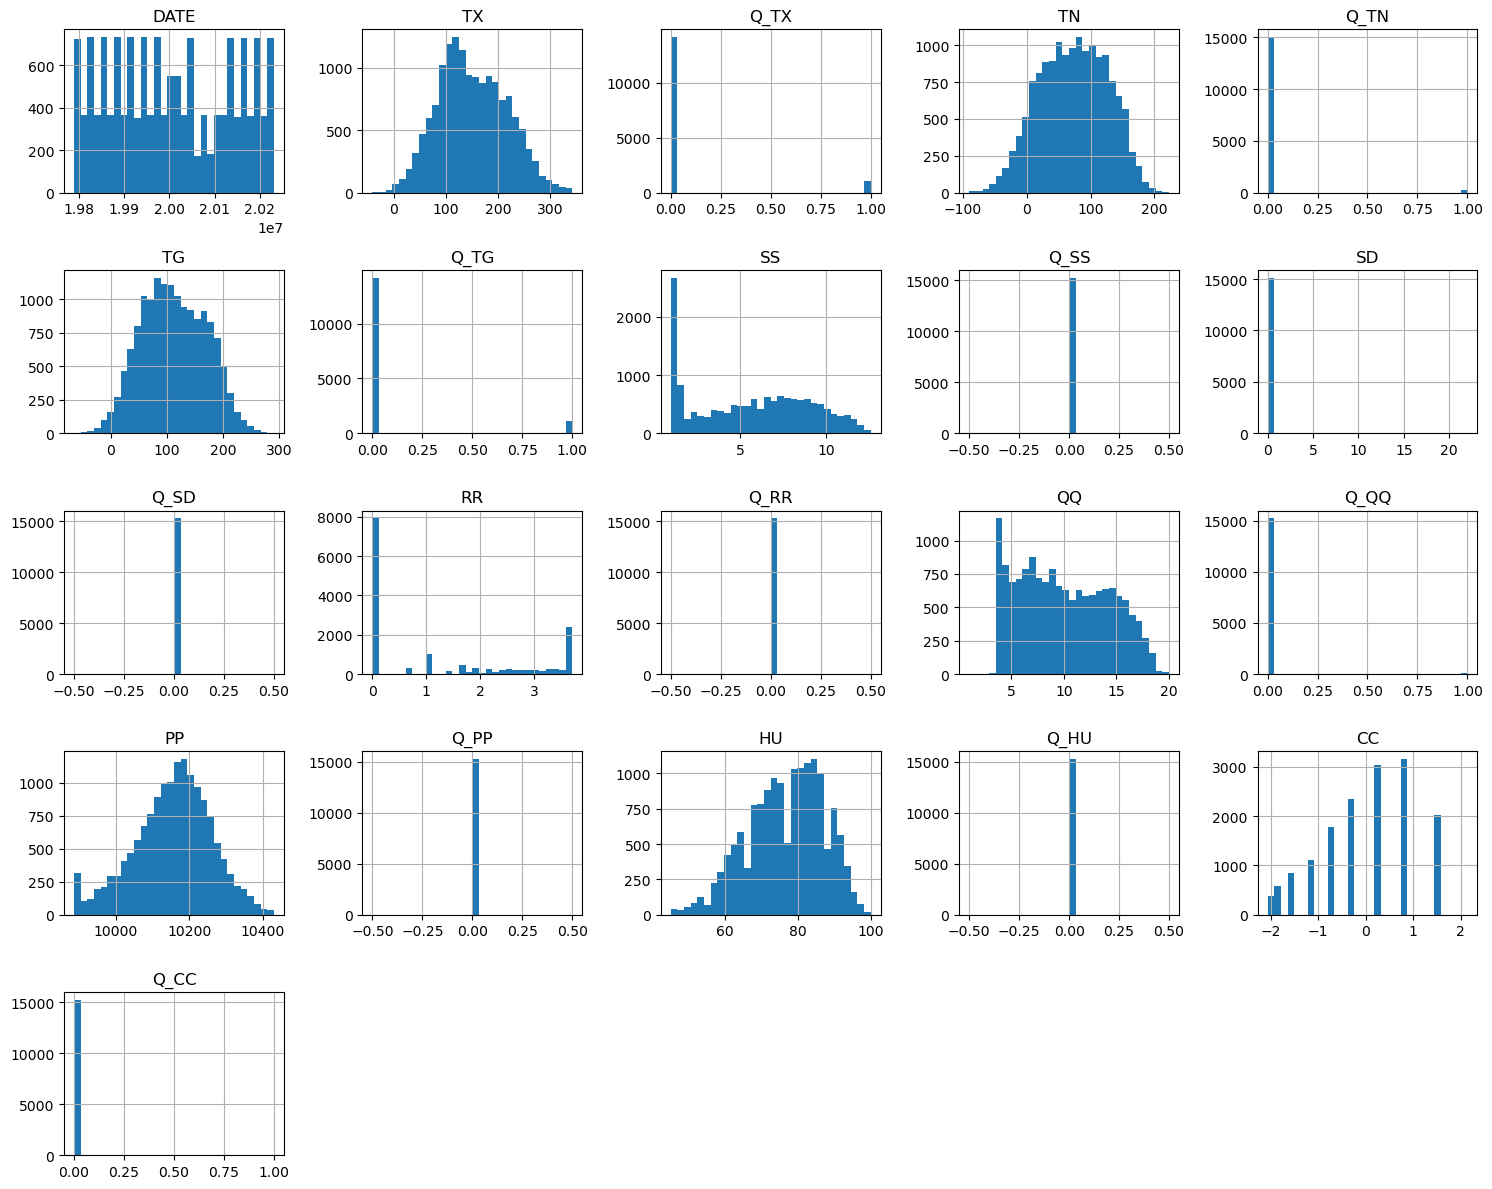

In [38]:
#Histogram Distribution of Data Features
df.hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

In [39]:
#Corelation Matrix
corr = df.corr()

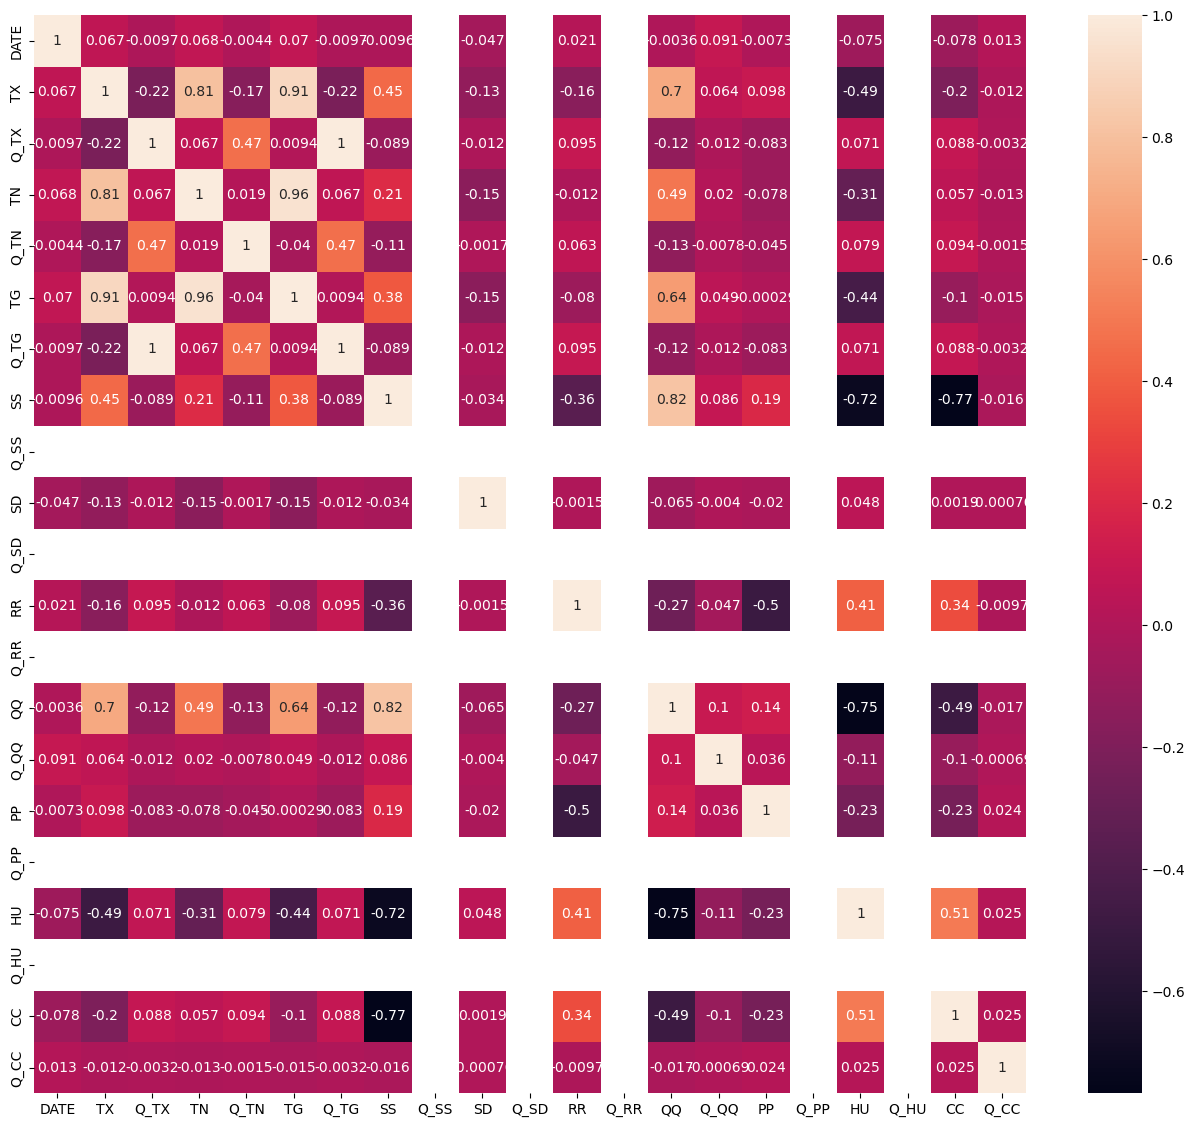

In [40]:
#Corelation Matrix
plt.figure(figsize=(16,14))
sns.heatmap(corr, annot=True)
plt.savefig("corre.png")
plt.show()

In [41]:
#Spiliting X and Y
X = df.drop('TG',axis = 1)
y = df['TG']

In [42]:
df.head(10)

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,8.426150,0,9.0,...,1.609438,0,7.280110,0,10190.0,0,83.0,0,-1.549742,0
1,19790102,16.0,0,-75.0,0,-26.0,0,4.242641,0,8.0,...,0.000000,0,5.291503,0,10253.0,0,76.0,0,0.263314,0
2,19790103,13.0,0,-72.0,0,-28.0,0,1.000000,0,4.0,...,0.000000,0,3.741657,0,10205.0,0,86.0,0,-0.271065,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,1.000000,0,2.0,...,0.000000,0,3.741657,0,10084.0,0,68.0,0,1.474227,0
4,19790105,56.0,0,-14.0,0,-8.0,0,4.582576,0,1.0,...,0.000000,0,5.477226,0,10225.0,0,73.0,0,0.263314,0
5,19790106,83.0,0,-66.0,0,-5.0,0,6.244998,0,1.0,...,2.079442,0,6.324555,0,10278.0,0,84.0,0,-0.271065,0
6,19790107,85.0,0,-53.0,0,15.0,0,1.000000,0,0.0,...,3.713572,0,3.741657,0,10252.0,0,93.0,0,1.474227,0
7,19790108,58.0,1,53.0,0,69.0,1,1.414214,0,0.0,...,2.197225,0,4.000000,0,10187.0,0,95.0,0,1.474227,0
8,19790109,52.0,0,16.0,0,37.0,0,7.681146,0,0.0,...,3.713572,0,7.141428,0,10117.0,0,86.0,0,-0.754168,0
9,19790110,49.0,0,14.0,0,33.0,0,4.472136,0,0.0,...,3.091042,0,5.567764,0,9886.0,0,87.0,0,0.845911,0


In [43]:
#Dropping the 'DATE' Column from Feature Set"
X = X.drop('DATE',axis = 1)

In [44]:
#Feature selection
sk = SelectKBest(score_func=f_classif,k=10)
x_kbest = sk.fit_transform(X,y)

In [45]:
#Checking Imporatant Featuress
select_ind = sk.get_support(indices=True)
selected_features = X.columns[select_ind]

In [46]:
selected_features

Index(['TX', 'TN', 'SS', 'SD', 'RR', 'QQ', 'Q_QQ', 'PP', 'HU', 'CC'], dtype='object')

In [47]:
#"Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)